In [23]:
import tensorflow as tf
# tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os
import datetime

import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer

In [19]:
EPOCHS = 10
INIT_LR = 1e-3
#to avoid crashing due to less ram
BS = 10
default_image_size = tuple((128,128))
width=128
height=128
depth=3
inputShape=(128,128,3)


labels=[
"Tomato___Tomato_mosaic_virus",
"Tomato___Early_blight",
"Tomato___Septoria_leaf_spot",
"Tomato___Bacterial_spot",
"Tomato___Target_Spot",
"Tomato___Spider_mites",
"Tomato___Tomato_Yellow_Leaf_Curl_Virus",
"Tomato___Late_blight",
"Tomato___healthy",
"Tomato___Leaf_Mold"
]


In [6]:
def img_to_np(DIR,flatten=True):
  #canny edge detection by resizing
  cv_img=mpimg.imread(DIR,0)
  cv_img=cv2.resize(cv_img,default_image_size)
  img = np.uint8(cv_img)
  #img = np.uint8((0.2126 * img[:,:,0]) + np.uint8(0.7152 * img[:,:,1]) + np.uint8(0.0722 * img[:,:,2]))
  #flatten it
  if(flatten):
    img=img.flatten()
  return img

In [10]:
TRAIN_DIR="../TomatoLeafDisease/tomato/train/"
index=0
data={}
for FOLDER in os.listdir(TRAIN_DIR):
    for image_dir in os.listdir(TRAIN_DIR+FOLDER):
      if index not in data:
        data[index]=[]
      try:  
        data[index].append(img_to_np(TRAIN_DIR+FOLDER+"/"+image_dir))
      except:
        print("Error to load the image "+TRAIN_DIR+FOLDER+"/"+image_dir)
    index=index+1  

In [ ]:

CLASS_LIMIT=500
colors=["r","b","m","y","k","c","#eeefff","#808000","#4B0082","#CD853F"]
for index_class in range(len(data)):
  index=0
  for arr in data[index_class]:
    plt.hist(arr,color=colors[index_class],alpha=0.5)
    if(index>CLASS_LIMIT):
      plt.title(labels[index_class])
      plt.show()
      break
    index=index+1    

In [3]:
labelencoder = LabelBinarizer()
label=labelencoder.fit_transform([0,1,2,3,4,5,6,7,8,9])
label

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [26]:
TRAIN_DIR="D:/POST_S1/BANGKIT/TomatoLeaf/tomato/train/"
index=0
data=[]
for FOLDER in os.listdir(TRAIN_DIR):
    print(TRAIN_DIR+FOLDER)
    for image_dir in os.listdir(TRAIN_DIR+FOLDER):
      data.append({"x":img_to_np(TRAIN_DIR+FOLDER+"/"+image_dir,flatten=False),"y":label[index]})
    index=index+1
x,y=[],[]
for obj in data:
  x.append(obj["x"])
  y.append(obj["y"])
x_train = np.array(x,dtype=np.float16)
y_train = np.array(y,dtype=np.float16)       

D:/POST_S1/BANGKIT/TomatoLeaf/tomato/train/Tomato___Bacterial_spot
D:/POST_S1/BANGKIT/TomatoLeaf/tomato/train/Tomato___Early_blight
D:/POST_S1/BANGKIT/TomatoLeaf/tomato/train/Tomato___healthy
D:/POST_S1/BANGKIT/TomatoLeaf/tomato/train/Tomato___Late_blight
D:/POST_S1/BANGKIT/TomatoLeaf/tomato/train/Tomato___Leaf_Mold
D:/POST_S1/BANGKIT/TomatoLeaf/tomato/train/Tomato___Septoria_leaf_spot
D:/POST_S1/BANGKIT/TomatoLeaf/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite
D:/POST_S1/BANGKIT/TomatoLeaf/tomato/train/Tomato___Target_Spot
D:/POST_S1/BANGKIT/TomatoLeaf/tomato/train/Tomato___Tomato_mosaic_virus
D:/POST_S1/BANGKIT/TomatoLeaf/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [27]:
TEST_DIR="D:/POST_S1/BANGKIT/TomatoLeaf/tomato/val/"
index=0
data=[]
for FOLDER in os.listdir(TEST_DIR):
    print(TEST_DIR+FOLDER)
    for image_dir in os.listdir(TEST_DIR+FOLDER):
      data.append({"x":img_to_np(TEST_DIR+FOLDER+"/"+image_dir,flatten=False),"y":label[index]})
    index=index+1
x,y=[],[]
for obj in data:
  x.append(obj["x"])
  y.append(obj["y"])
x_test = np.array(x,dtype=np.float16)
y_test = np.array(y,dtype=np.float16)  

D:/POST_S1/BANGKIT/TomatoLeaf/tomato/val/Tomato___Bacterial_spot
D:/POST_S1/BANGKIT/TomatoLeaf/tomato/val/Tomato___Early_blight
D:/POST_S1/BANGKIT/TomatoLeaf/tomato/val/Tomato___healthy
D:/POST_S1/BANGKIT/TomatoLeaf/tomato/val/Tomato___Late_blight
D:/POST_S1/BANGKIT/TomatoLeaf/tomato/val/Tomato___Leaf_Mold
D:/POST_S1/BANGKIT/TomatoLeaf/tomato/val/Tomato___Septoria_leaf_spot
D:/POST_S1/BANGKIT/TomatoLeaf/tomato/val/Tomato___Spider_mites Two-spotted_spider_mite
D:/POST_S1/BANGKIT/TomatoLeaf/tomato/val/Tomato___Target_Spot
D:/POST_S1/BANGKIT/TomatoLeaf/tomato/val/Tomato___Tomato_mosaic_virus
D:/POST_S1/BANGKIT/TomatoLeaf/tomato/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [28]:
# with tpu_strategy.scope():
model = Sequential()
chanDim=-1
model.add(Conv2D(128, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 128, 128, 128)     3584      
_________________________________________________________________
activation_15 (Activation)   (None, 128, 128, 128)     0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 128, 128, 128)     512       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 42, 42, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 42, 42, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 42, 42, 128)       147584    
_________________________________________________________________
activation_16 (Activation)   (None, 42, 42, 128)      

In [ ]:
# with tpu_strategy.scope():
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
aug = ImageDataGenerator(fill_mode="nearest")
model_history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
)

Epoch 1/10
1000/1000 [==============================] - 2164s 2s/step - loss: 0.2559 - accuracy: 0.9125 - val_loss: 0.6408 - val_accuracy: 0.8566
Epoch 2/10
1000/1000 [==============================] - 3155s 3s/step - loss: 0.1900 - accuracy: 0.9311 - val_loss: 0.2041 - val_accuracy: 0.9274
Epoch 3/10
 401/1000 [===========>..................] - ETA: 17:41 - loss: 0.1692 - accuracy: 0.9362

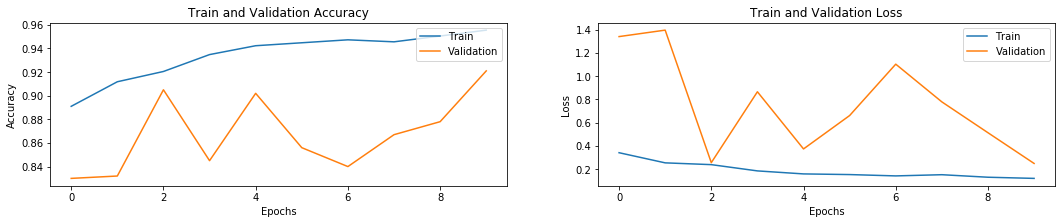

In [25]:
fig, ax = plt.subplots(1,2,figsize=(18,3))
ax[0].plot(model_history.history["accuracy"])
ax[0].plot(model_history.history["val_accuracy"])
ax[0].set_title("Train and Validation Accuracy")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].legend(['Train', 'Validation'], loc='upper right')

ax[1].plot(model_history.history["loss"])
ax[1].plot(model_history.history["val_loss"])
ax[1].set_title("Train and Validation Loss")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].legend(["Train", "Validation"], loc="upper right")
# plt.savefig(datetime.now().strftime("%m%d%Y_%H%M%S") + '.png')
plt.savefig(datetime.datetime.now().strftime("%m%d%Y_%H%M%S") + '.png')
plt.show()

In [ ]:
model.save("/kaggle/working/model.h5")

In [ ]:
scores = model.evaluate(x_test, y_test)
print("Accuracy is :"+str(scores[1]*100)+" %")

In [ ]:
arr=img_to_np("/kaggle/input/tomatoleaf/tomato/val/Tomato___Tomato_mosaic_virus/0c676b36-7985-42e8-b550-83e2b1c55535___PSU_CG 2177.JPG",flatten=False)
arr=arr.reshape(1,128,128,3)
labels[labelencoder.inverse_transform(model.predict(arr))[0]]

In [ ]:
arr=img_to_np("/kaggle/input/tomatoleaf/tomato/val/Tomato___healthy/0cb10f98-491d-4e1f-b8ea-4fb0f1b3675f___GH_HL Leaf 333.JPG",flatten=False)
arr=arr.reshape(1,128,128,3)
labels[labelencoder.inverse_transform(model.predict(arr))[0]]